# Шаг 1: Подготовка

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
data.shape

(35218, 156)

In [3]:
# Предположим, что последняя колонка - это целевая переменная
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шан 2: Обучение моделей

In [4]:
# 1. Случайный лес
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [5]:
# 2. Бэггинг
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

In [6]:
# 3. AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

c:\Users\Sargeras\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [7]:
# 4. Градиентный бустинг
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [9]:
# Оценка качества моделей
models = {
    'Случайный Лес': y_pred_rf,
    'Бэггинг': y_pred_bagging,
    'AdaBoost': y_pred_ada,
    'Градиентный Бустинг': y_pred_gb
}

In [10]:
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Точность: {accuracy:.3f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Случайный Лес - Точность: 0.999
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3540
         1.0       1.00      1.00      1.00      3504

    accuracy                           1.00      7044
   macro avg       1.00      1.00      1.00      7044
weighted avg       1.00      1.00      1.00      7044

[[3537    3]
 [   3 3501]]
Бэггинг - Точность: 0.998
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3540
         1.0       1.00      1.00      1.00      3504

    accuracy                           1.00      7044
   macro avg       1.00      1.00      1.00      7044
weighted avg       1.00      1.00      1.00      7044

[[3538    2]
 [  10 3494]]
AdaBoost - Точность: 0.994
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3540
         1.0       1.00      0.99      0.99      3504

    accuracy                           0.99

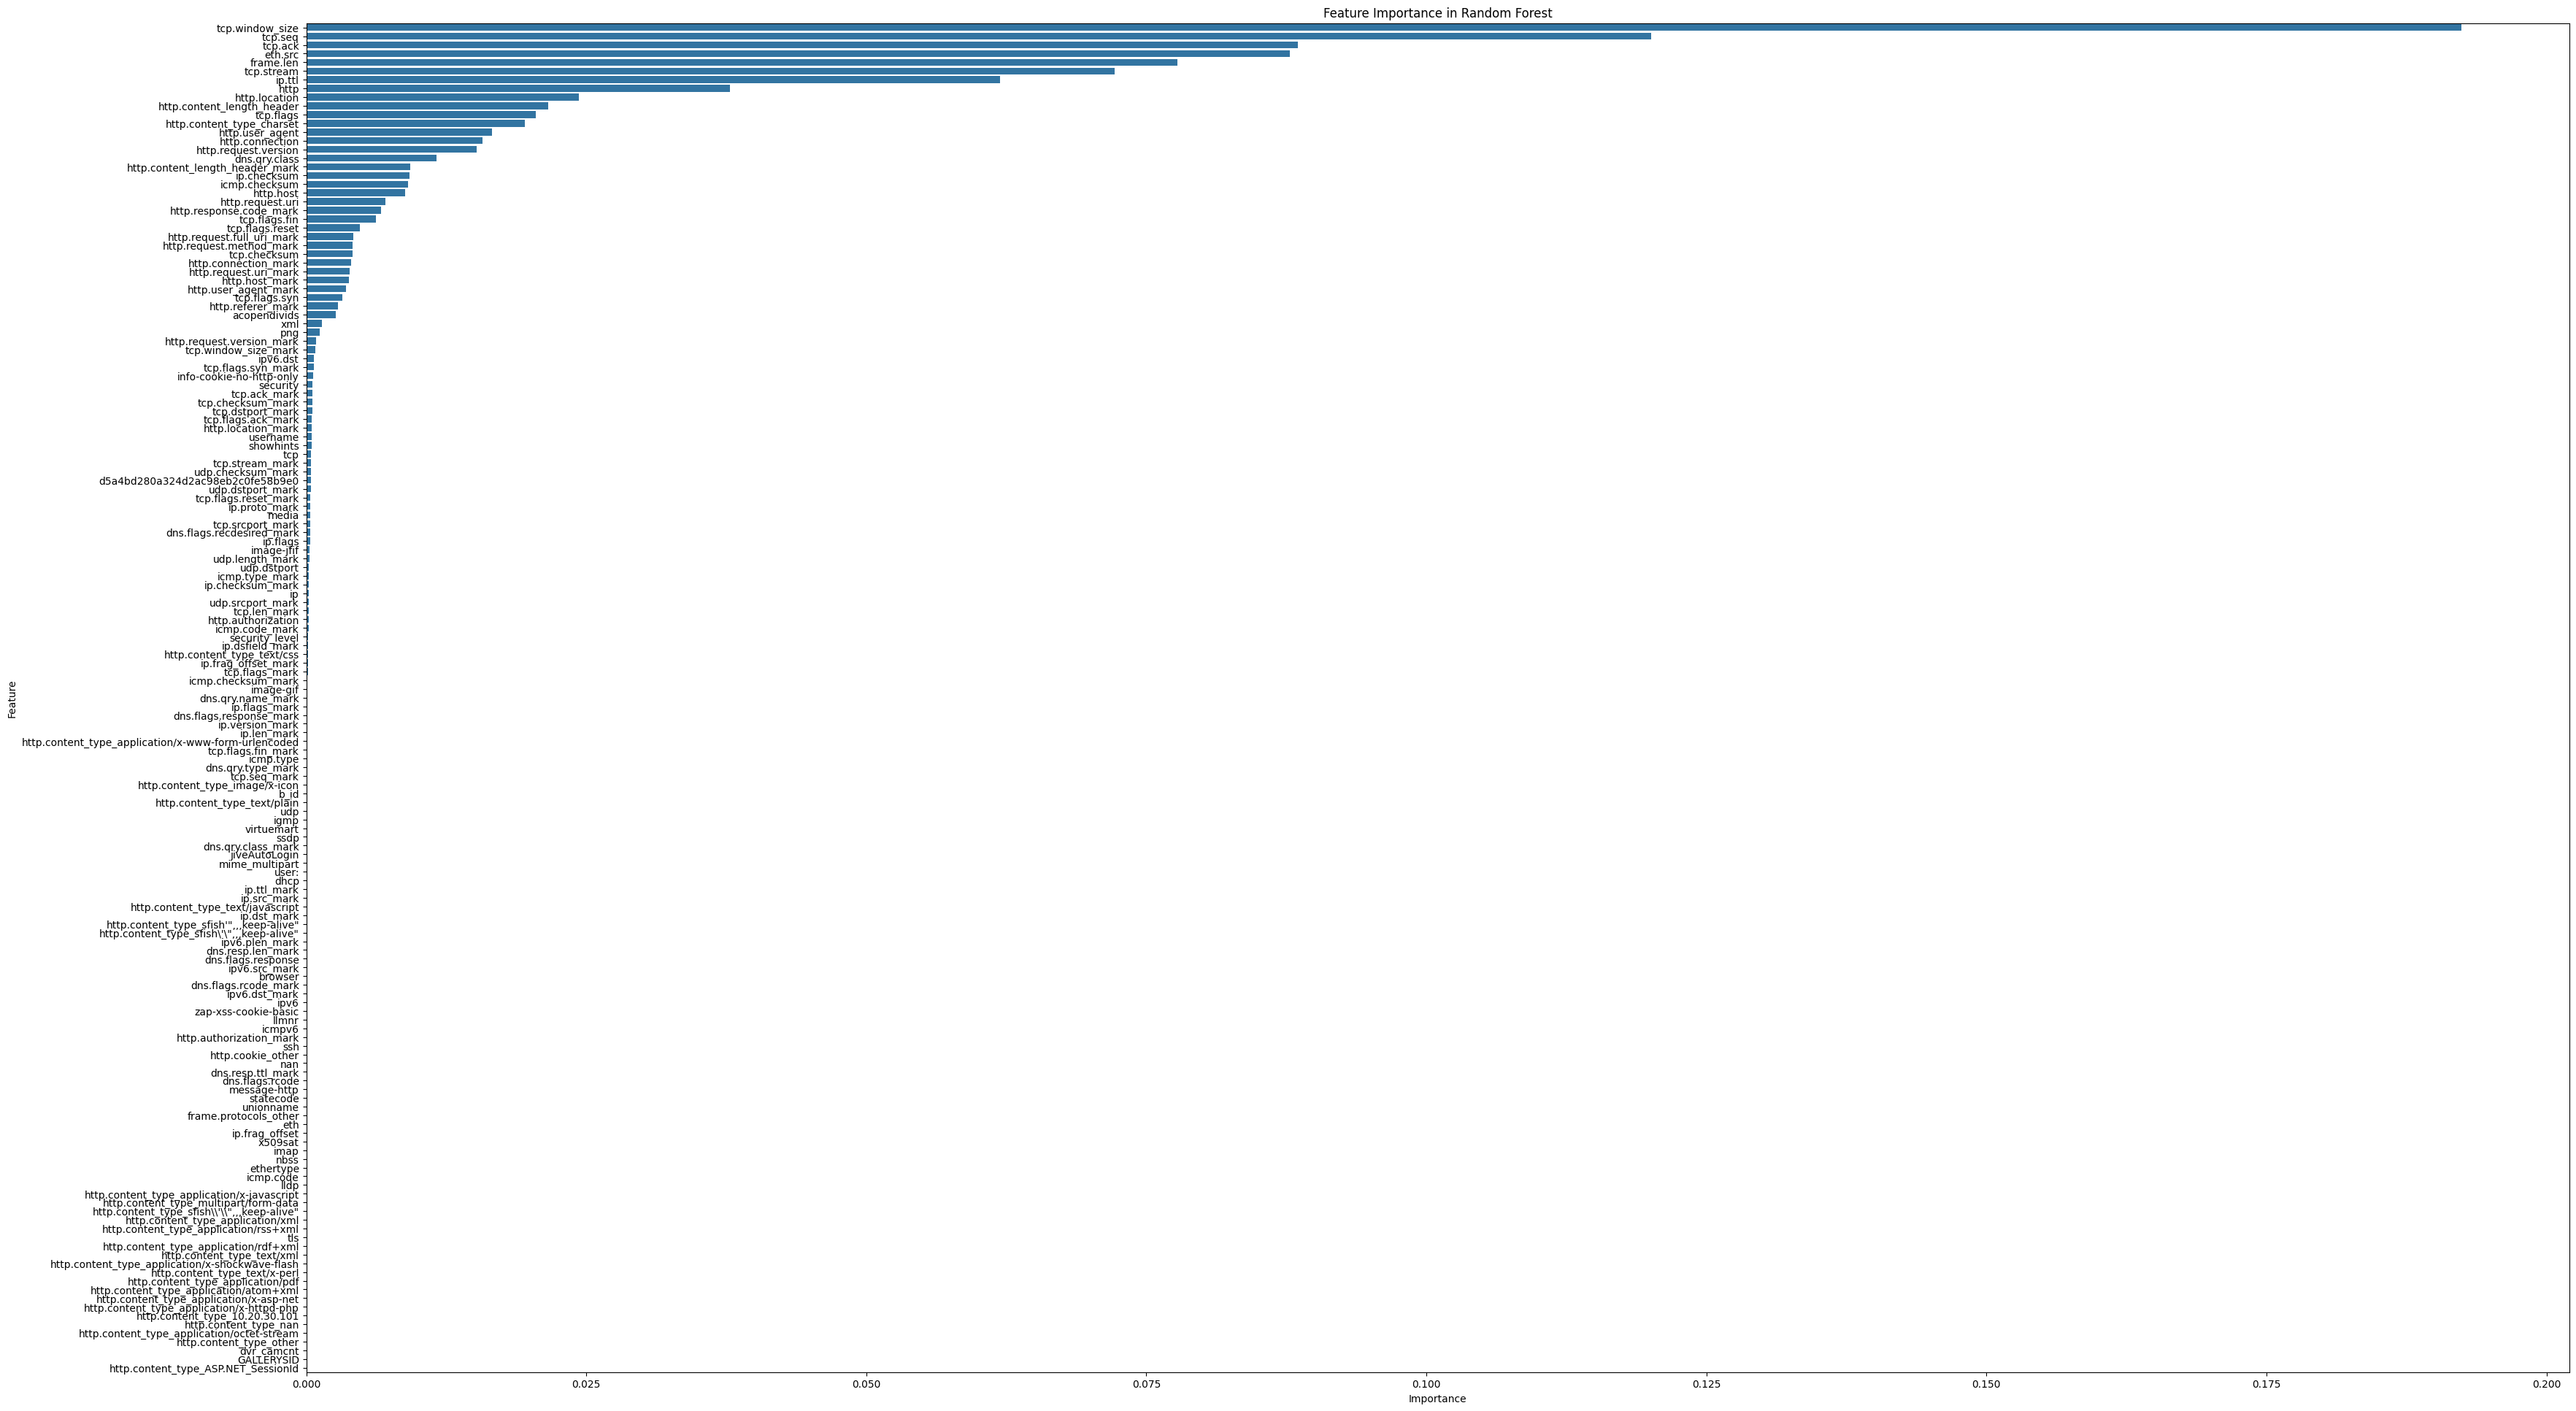

In [12]:
# Построение графика важности признаков для случайного леса
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(40, 24))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()